In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
%matplotlib inline

In [21]:
def multi_r_cobweb_plot(r, x_0, nmax = 100, diagonal_color = 'black', curve_color = 'blue', cobweb_color = 'red'):
    x = np.linspace(0,1,1000)
    plt.figure()
    
    # Plot
    plt.plot(x, x, c = diagonal_color)
    for i in range(len(r)):
        plt.plot(x, r[i] * x * (1 - x), c = curve_color)
    
    f = lambda x,r: r*x*(1-x)
     
    # Store all of the points to draw the lines between
    x_plots = np.empty(nmax+1)
    y_plots = np.empty(nmax+1)
    
    x_plots[0] = x_0
    y_plots[0] = 0

    # Iteratively find the rest of the points
    i = 0
    for n in range(1, nmax, 2):
        d  = i % len(r)
        i = i + 1
        # Vertical Lines:
        # the x value is the same but the y value changes based on the function (curve)
        x_plots[n] = x_plots[n-1]
        y_plots[n] = f(x_plots[n],r[d])
        
        # Horizontal Lines
        # the y value is the same but the the new x value = y value as the diagonal line is y = x
        x_plots[n+1] = y_plots[n]
        y_plots[n+1] = y_plots[n]
    
    # plots a line that goes though the arrays of points constructed
    plt.plot(x_plots, y_plots, c = cobweb_color)    
    
    # set y and x ticks
    plt.xticks(np.linspace(0,1,11))
    plt.yticks(np.linspace(0,1,11)) 
    plt.grid()

    plt.show()

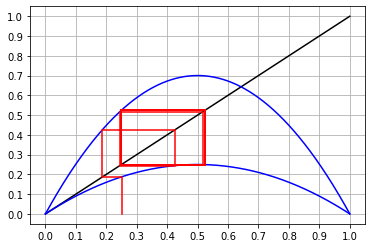

In [22]:
r_values = (1, 2.8)
x_zero = .25
multi_r_cobweb_plot(r_values, x_zero)

In [23]:
def bifurcation_plot(r_b, x_0, nmax = 200, savepng = False, r_start = 2, r_end = 4):
    
    r = np.arange(r_start, r_end, .0001)
    
    fig = plt.figure(figsize=(10.5, 8), tight_layout=True)
    fig.patch.set_facecolor('white')

    x = x_0
    
    
    for i in range(700):
        if i % 2 == 0:
            x = np.multiply(x, r) * np.subtract(1,x)
        else :
            x = np.multiply(x, r_b) * np.subtract(1,x)
    
    for i in range(nmax):
        if i % 2 == 0:
            x = np.multiply(x, r) * np.subtract(1,x)
            plt.scatter(r,x,s =.0001, color = "black")
        else:
            x = np.multiply(x, r_b) * np.subtract(1,x)
            plt.scatter(r,x,s =.0001, color = "blue")
    
    # set y and x ticks
    # plt.xticks(np.linspace(1,4,11))
    plt.grid()

    plt.xlabel('r')
    plt.ylabel('x')
    
    plt.title("$r_b$ =" + str(r_b))
    
    if(savepng):
        fig.savefig("bif x_0=" + str(x_0) + ".png", bbox_inches='tight')
    
    plt.show()

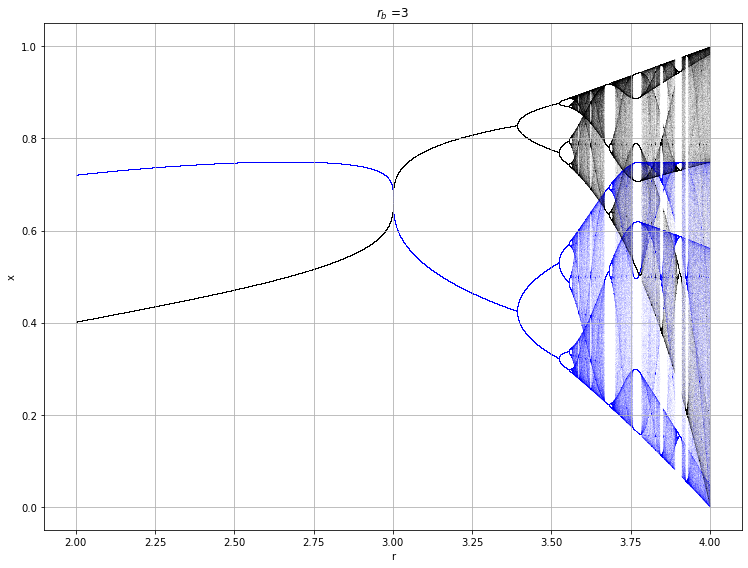

In [24]:
bifurcation_plot(3, x_zero)

In [45]:
def lyapunov_plot(x_0, nmax = 200, savepng = False, r_start = 2, r_end = 4):
    
    size = .001
    r = np.arange(r_start, r_end, size)
    
    
    fig = plt.figure(figsize=(10.5, 8), tight_layout=True)
    fig.patch.set_facecolor('white')
    epsilon = .00000001
    # epsilon = 0
    x = x_0
    lya = np.zeros(len(r))
    
    for i in range(1000):
        x = np.multiply(x, r) * np.subtract(1,x)
    
    for i in range(nmax):
        x = np.multiply(x, r) * np.subtract(1,x)
    #    plt.scatter(r,x,s =.0001, color = "red")
        lya = np.add(lya , np.log(np.add(np.abs(np.multiply(r, (np.subtract(1, (np.multiply(2, x)))))), epsilon)))
        
    lya = np.divide(lya, nmax)
    plt.scatter(r, lya ,s =.1, color = "black")
    
    print(max(lya))
    
    # set y and x ticks
    # plt.xticks(np.linspace(1,4,11))
    plt.grid()

    plt.xlabel('r')
    plt.ylabel('x')
    
    plt.title("$x_0$ =" + str(x_0))
    
  #  plt.ylim([-1,1])
    
    if(savepng):
        fig.savefig("bif x_0=" + str(x_0) + ".png", bbox_inches='tight')
    
    plt.show()

0.6788134728339412


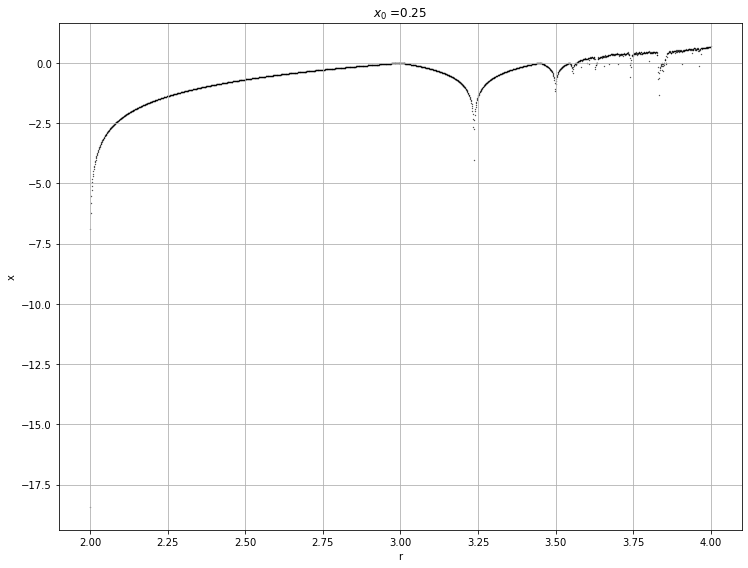

In [46]:
lyapunov_plot(.25)

In [87]:
def lyapunov_fractal(nmax, x_0 = .25, ra_start = 2, ra_end = 4, rb_start = 2 , rb_end = 4):

    step_size = .01
    
    ra = np.arange(ra_start, ra_end, step_size)
    rb = np.arange(rb_start, rb_end, step_size)
    
    r_b = 3
    
    r = np.meshgrid(ra, rb)
    print(len(r))
    
    x = [ [x_0 for a in range(len(ra))] for b in range(len(rb))]
    lya = np.zeros(len(ra))
    epsilon = .00000001

    
    for i in range(1000):
        if i % 2 == 0:
            x = np.multiply(x, ra) * np.subtract(1,x)
        else :
            x = np.multiply(x.T, r_b).T * np.subtract(1,x)
    
    for i in range(nmax):
        
        if i % 2 == 0:
            x = np.multiply(x, ra) * np.subtract(1,x)
            lya = np.add(lya , np.log(np.add(np.abs(np.multiply(ra, (np.subtract(1, (np.multiply(2, x)))))), epsilon)))
            
        else:
            x = np.multiply(x.T, rb).T * np.subtract(1,x)
            lya = np.add(lya , np.log(np.add(np.abs(np.multiply(r_b, (np.subtract(1, (np.multiply(2, x)))))), epsilon)))
        
    print(len(lya))
    
    lya = np.divide(lya, nmax)
    
    ax = sb.heatmap(lya, robust=True, vmax = 0, square=True, cmap='flare')
    
    ax.invert_yaxis()
    
    xticks = np.arange(ra_start, ra_end, .2)
    yticks = np.arange(rb_start, rb_end, .2)
    
    # plt.xticks(xticks)
    # plt.yticks(yticks)
    plt.show()
    


2
200


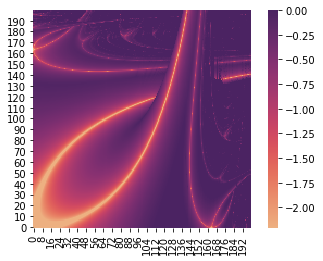